# 🌳 Random Forest
---

## 🌟 1. Random Forest: Intuition

- **Random Forest** is an **ensemble learning method**.
- It builds **many decision trees** and **aggregates** their outputs.
- **Goal**: Improve accuracy and reduce overfitting compared to a single tree.

**Key ideas**:
1. **Bagging (Bootstrap Aggregating)**:
   - Each tree is trained on a random sample **with replacement**.
2. **Random Feature Selection**:
   - Each tree split only considers a random subset of features.

**Final Prediction**:
- **Classification** → **Majority vote** among trees.
   `ŷ = majority_vote(Tree₁(x), Tree₂(x), ..., Treeₘ(x))`
- **Regression** → **Average** prediction across trees.
   `ŷ = (1/M) * Σ Treeᵢ(x)`

---

## 📜 2. How Random Forest Works Step-by-Step

1. **Sample** data randomly (with replacement) for each tree.
- **For each tree**:
  - Randomly sample the dataset (bootstrap sampling).
  - At each split:
    - Randomly select `k` features (where `k << p`).
    - Find the best split among these `k` features.
2. **Train** each tree on its sample.
3. At each node split, **randomly choose a subset of features**.
4. **Aggregate** predictions at the end:
   - Voting (classification) or Averaging (regression).

Randomness reduces the correlation between trees, leading to better ensemble performance.

---

## ⚙️ 3. Important Parameters

| Parameter | Description |
|:----------|:------------|
| `n_estimators` | Number of trees in the forest |
| `max_features` | Number of features considered when looking for the best split |
| `max_depth` | Maximum depth of each tree |
| `bootstrap` | Whether to use bootstrap samples when building trees |

---

## 🔍 4. Tiny Random Forest Example: Manual Understanding

Imagine the dataset:

| ID | Feature 1 | Feature 2 | Label |
|----|-----------|-----------|-------|
| 1  | 2         | 3         | 0     |
| 2  | 1         | 5         | 0     |
| 3  | 4         | 2         | 1     |
| 4  | 5         | 1         | 1     |

- Build 2 trees.
- Randomly pick samples with replacement for each tree.
- Randomly pick 1 feature at each split.

---

## 🌳 Example: Build Trees

**Tree 1**:

- Bootstrap samples: IDs {2, 3}.
- Feature selected: Feature 2.
- Best split threshold: Feature 2 ≤ 3.5.

Prediction rule:
- If Feature 2 ≤ 3.5 → predict 1.
- Else → predict 0.

---

**Tree 2**:

- Bootstrap samples: IDs {1, 4}.
- Feature selected: Feature 1.
- Best split threshold: Feature 1 ≤ 3.5.

Prediction rule:
- If Feature 1 ≤ 3.5 → predict 0.
- Else → predict 1.

---

## 📈 Predicting New Sample

Given (Feature 1 = 3, Feature 2 = 2):

- Tree 1 → Predicts 1
- Tree 2 → Predicts 0
- Final decision → Majority vote (tie-breaking if needed).

---


4. ✨ Observations

- Single decision trees are simple and rough.
- Random Forest builds many diverse trees.
- Ensemble of trees provides:
    - Higher accuracy,
    - More stable predictions,
    - Less overfitting.
- Boxes become smaller when trees are deeper and there are more trees.

5. 🏆 Conclusion

- Random Forest = many weak trees combined into a strong model.
- Randomness creates diversity among trees.
- Aggregation (voting or averaging) leads to powerful generalization.
- Increasing:
    - Number of trees → smoother and stronger decision boundaries.
    - Tree depth → smaller, more detailed partitions.
- Random Forest is powerful and robust, especially on noisy and complex datasets!

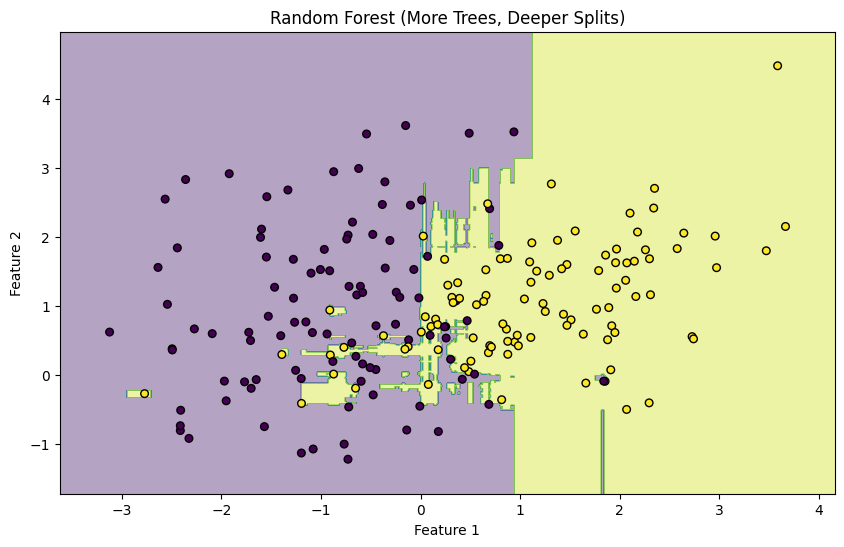

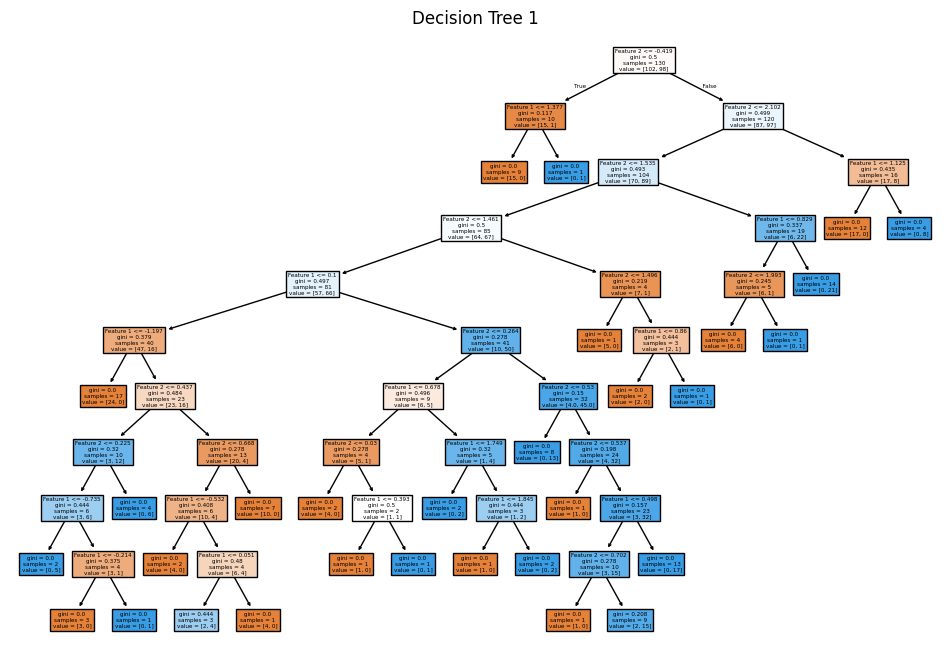

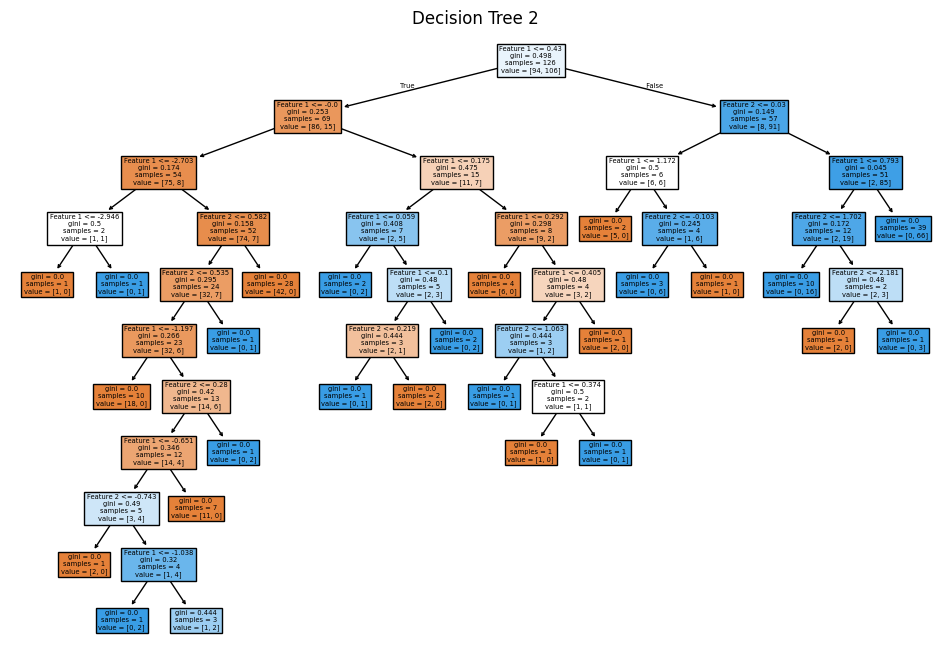

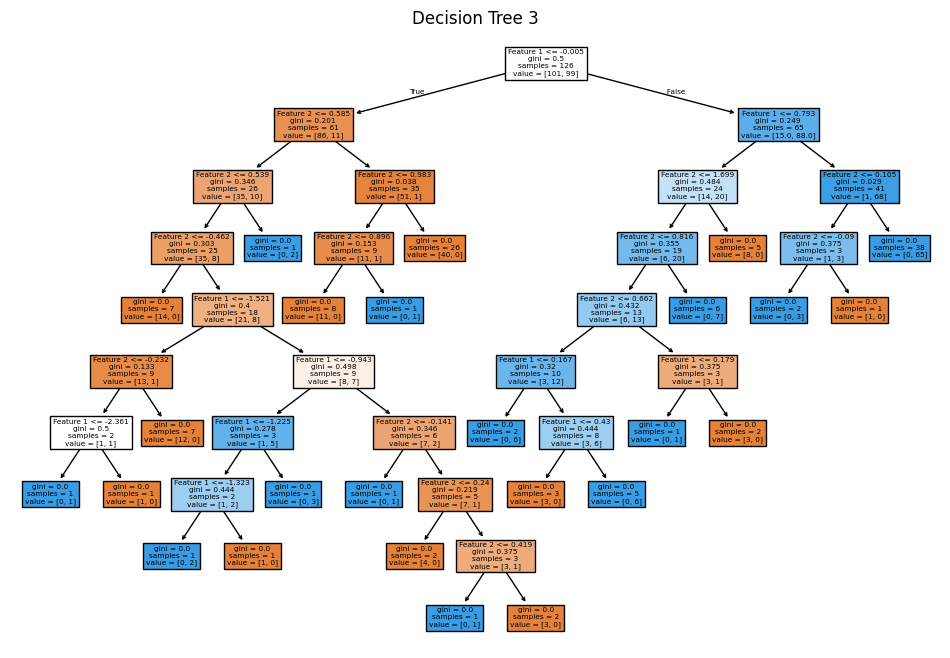

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Generates easy-to-plot 2D classification data.
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# 1. Generate 2D Classification Dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

# 2. Train Random Forest (with more trees and deeper trees)
rf = RandomForestClassifier(
    n_estimators=50,     # more trees → finer, smoother decision boundary.
    max_depth=10,        # deeper trees (more splits) → smaller boxes, more detailed splits.
    min_samples_split=2, # Allow splits even on very small groups.
    random_state=42
)
rf.fit(X, y)

# 3. Plot Decision Boundary - Visualizes model predictions across the feature space.
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the Random Forest decision boundary
plot_decision_boundary(rf, X, y, title="Random Forest (More Trees, Deeper Splits)")

# 4. Visualize a Few Trees (optional)
for idx, tree in enumerate(rf.estimators_[:3]):  # just first 3 trees for quick visualization
    plt.figure(figsize=(12, 8))
    # Displays how individual trees split the feature space.
    plot_tree(tree, filled=True, feature_names=["Feature 1", "Feature 2"])
    plt.title(f"Decision Tree {idx + 1}")
    plt.show()
